## Background
1. For this assignment, I had the unique opportunity to use data i collected from a high altitude balloon payload. This payload gathered data from the implemented sensors on board (ext./int. temp, humidity, pressure, acceleration), and returned this via microSD in relation to time. After recovering the payload, we are left with a massive .csv file of all the sensor readings at small time increments. My problem is using the massive data dump to create a useful and accurate visualization of the data collected, as well as using the data to pinpoint certain events during the flight of my payload (takeoff, atmoshpheric layers, balloon burst and post-burst chaotic whipping).



2. As mentioned, my data is sent via serial bus to a micro SD card from the Arduino onboard the payload. At this point, it is hard to imagine bias in a system like this, as i designed and built the physical payload alone. But, my notions of what the data should look like prior to the launch may play some effect into how I create the visualization, so this may be bias to take into account. There is no article to link this data from, but here is some more info on the payload project, and my source data will be referenced in this notebook as well. https://www.colorado.edu/spaceminor/space-minor-balloon-payload-program-information

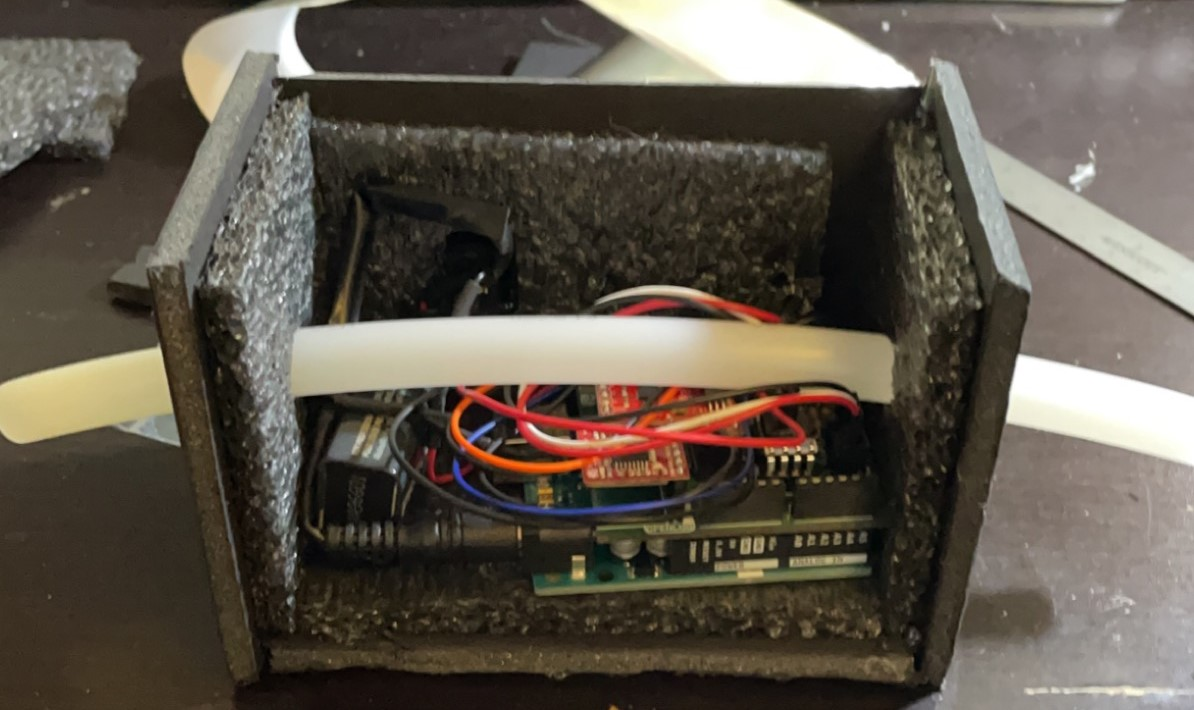


## Discover & Design
3. Using the data gathered, my aim is to 1: Create clear, concise graphs to represent the massive amount of data recorded, and 2: Use the sensor data to examine events in the payload flight.



4. For my sketch, I created a rough prototype of what I want my visualization to look like. Note the main graph, which includes all of the sensor data over time, and id like to create auxillary graphs to break down specific sensor data as well. The goal is to create functional graphics for a visual representation of the data. This is a rough prototype of what i want my graphics to look like:

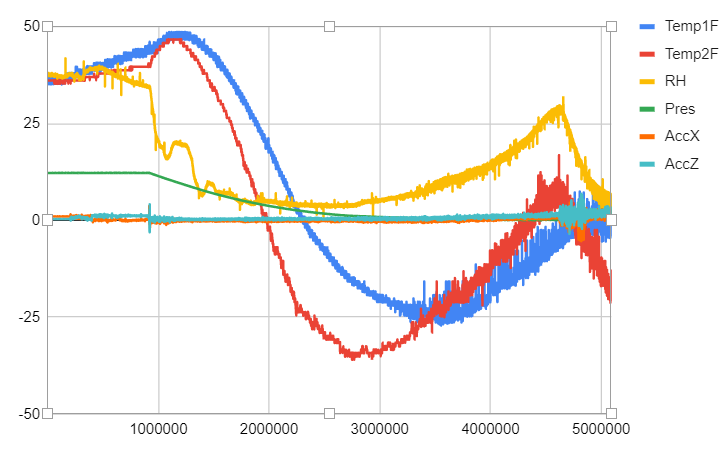


## Payload Code
5. In order to collect data from the payload, a program is needed to take the sensor outputs and store them somewhere useful. The microcontroller is an Arduino Uno, which i used the Arduino IDE to write and upload my program to the payload. The Arduino IDE is programmed in a C++ hybrid, but it has lots of python overlaps. Basically, when the payload is switched on, the Arduino takes the sensor readings every second and pushes that data to a Micro:SD card. Here is the code for the Arduino, it can also be seen in this writeup's source code folder:

## Data
6. After a successful flight of my payload, I am left with a massive .csv file with over 10,000 rows. The pictures from the flight were breathtaking as well. Here is a great shot right before burst:

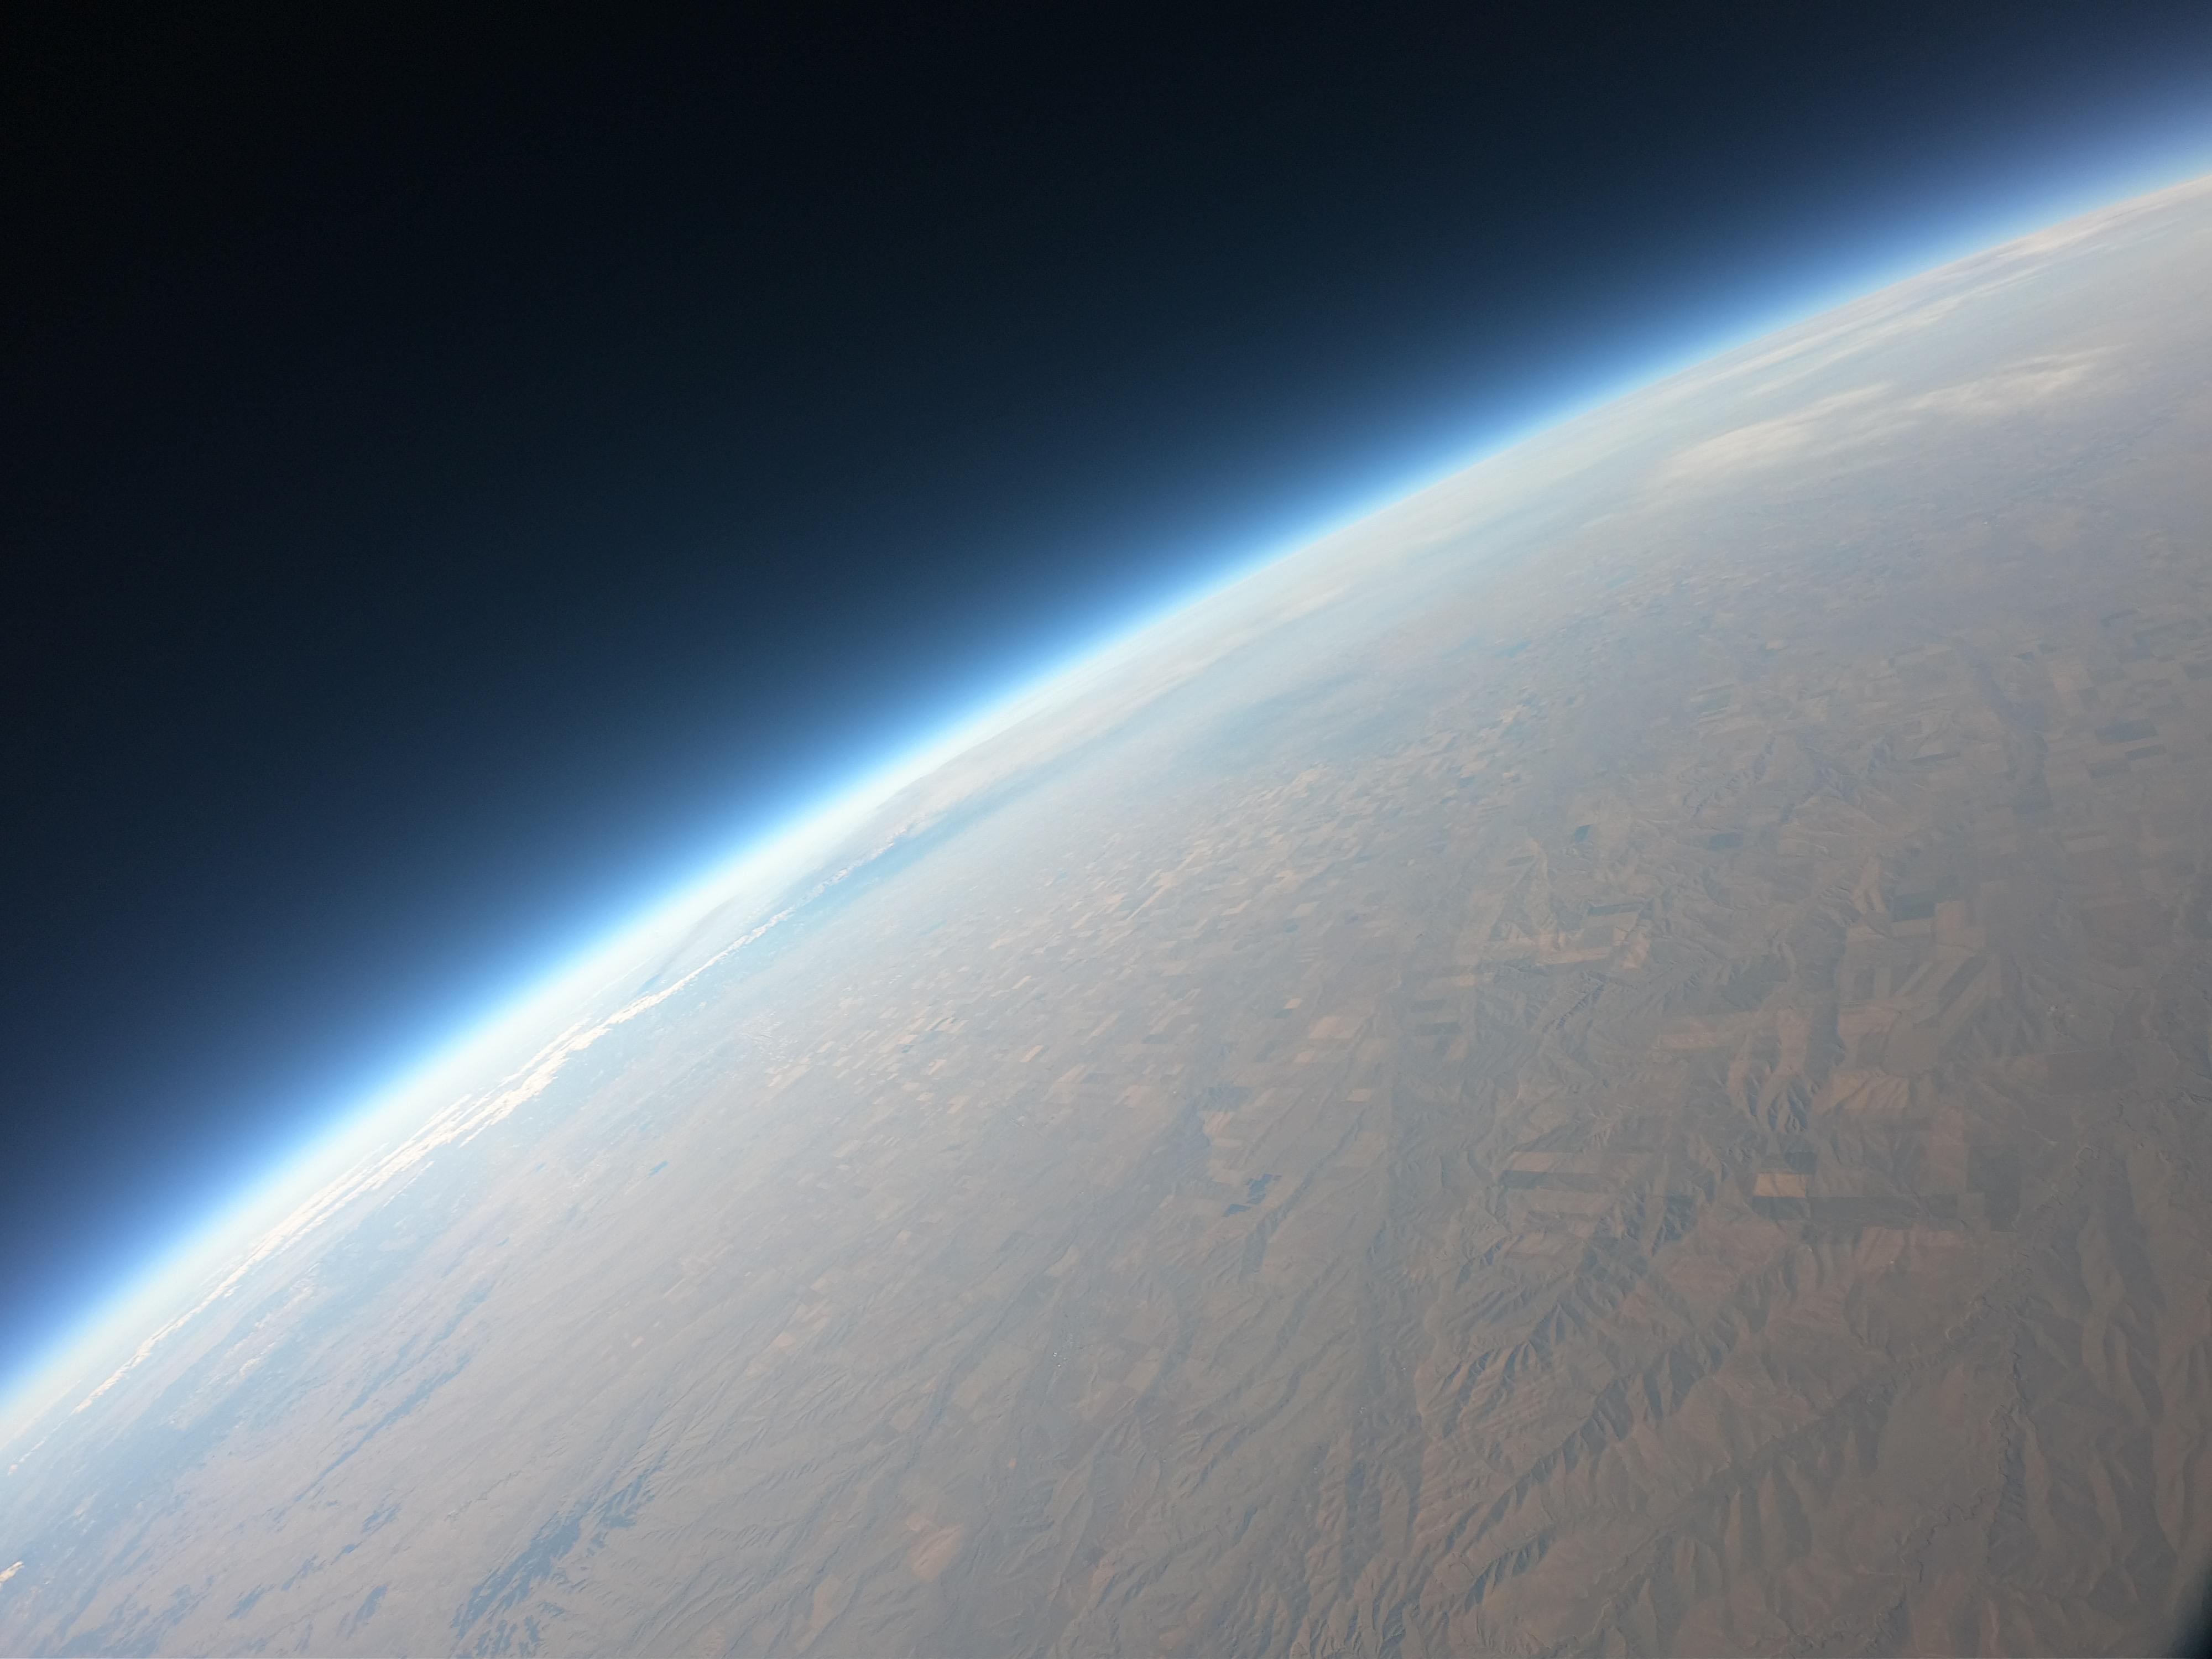

7. As mentioned, we are left with a large .csv file containing our flight data. Using the Pandas topics we learned in class, i am going to write a script to store our data in a large dataframe, and then use a bit of Plotly/Seaborn to create comprehensive graphical representations of my data.

## Visualization Code

In [96]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
filename = "payloaddata.csv"
## reading in .csv
payloadDF = pd.read_csv(filename)
payloadDF.head()

Time  Interior Temp  Exterior Temp  Relative Humidity  Air Pressure  \
0     1          37.01          36.13              37.57         12.26   
1     2          36.13          36.13              37.57         12.26   
2     3          36.13          36.13              37.42         12.27   
3     4          36.13          36.13              37.42         12.26   
4     5          35.26          36.13              37.89         12.26   

   Acceleration (X)  Acceleration (Z)  
0             1.028             0.362  
1             1.013             0.347  
2             0.998             0.347  
3             1.013             0.347  
4             1.013             0.347

8. The payload data is now loaded into a Pandas dataframe (payloadDF). Using this dataframe, we can examine for interesting parts in the flight using a little code. 

In [97]:
#finding the max value from the acceleration column
maxG = payloadDF["Acceleration (Z)"].max()
print("The max G force pulled by payload over duration of flight was", maxG, "Gs")
#using other columns, we can find out other useful things about the flight
minT = payloadDF["Exterior Temp"].min()
print("The coldest temperature reading was", minT, "degrees Farenheit")
lowAP = payloadDF["Air Pressure"].min()
print("The payload experienced a lowest air pressure of", lowAP, "psi")


The max G force pulled by payload over duration of flight was 6.597 Gs
The coldest temperature reading was -36.01 degrees Farenheit
The payload experienced a lowest air pressure of -0.01 psi


9. This analysis ended up being really interesting. The payload experienced almost 7gs of graviational force, which is about as much as a fighter pilot can pull in newer age aircraft! It got very cold, but what stood out to me was the air pressure reading. -.01 psi of air pressure would mean that the payload was very close to the vaccum of space, which is also impressive.

In [34]:
#remove time column for easier graph
del payloadDF["Time"]

Text(0.5, 0, 'Time (s)')

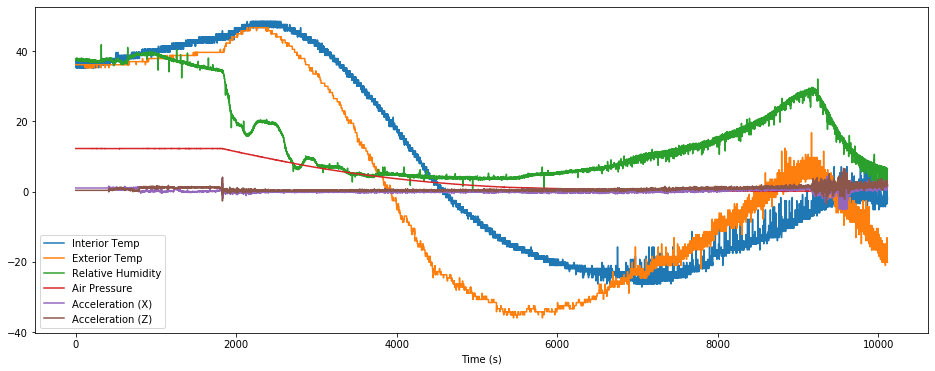

In [36]:
#set figure size and graph all data
plt.figure(figsize=(16,6))
sb.lineplot(data=payloadDF, dashes = False)
plt.xlabel("Time (s)")

10. This is the graph of all of my payload data over time. It is a bit jumbled, but you can clearly see some interesting points in the flight. The small spikes in the beginning and end of the Acceleration data signify launch, and when the balloon burst respectively. It is quite hard to see the acceleration readings on a graph with all other data, so lets create one for just the data we want to examine.

Text(0.5, 1.0, 'Acceleration')

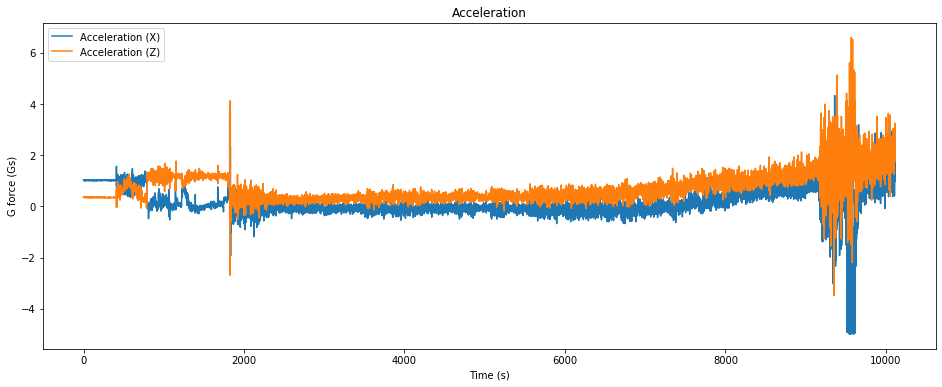

In [47]:
#creating new dataframe to store just acceleration
accelDF = payloadDF[["Acceleration (X)", "Acceleration (Z)"]]
#plotting the new dataframe
plt.figure(figsize=(16,6))
sb.lineplot(data=accelDF, dashes = False)
plt.xlabel("Time (s)")
plt.ylabel("G force (Gs)")
plt.title("Acceleration")


11. With just the acceleration data, we can see those spikes quite clearly, signifying takeoff and burst. This pattern persists with other sensors as well, with changes occuring in the general data readout around 1800 seconds and again around 9500 seconds.

Text(0.5, 1.0, 'Temperature')

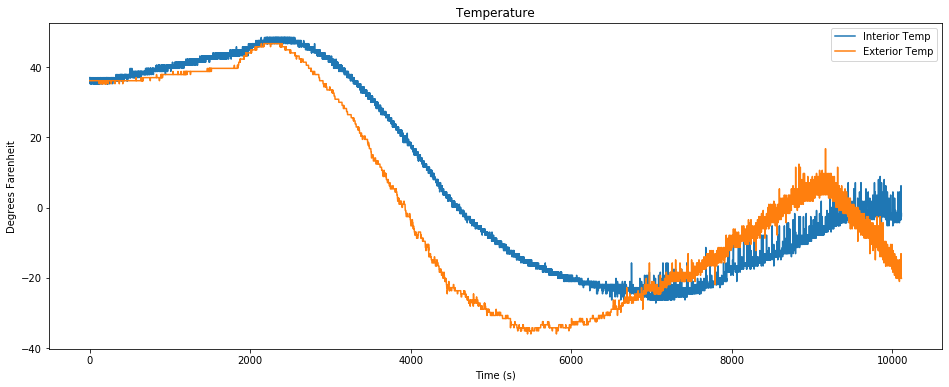

In [48]:
#creating new dataframe to store just temp
tempDF = payloadDF[["Interior Temp", "Exterior Temp"]]
#plotting the new dataframe
plt.figure(figsize=(16,6))
sb.lineplot(data=tempDF, dashes = False)
plt.xlabel("Time (s)")
plt.ylabel("Degrees Farenheit")
plt.title("Temperature")

In [93]:
#import US standard atmoshpere data for comparison
atmosData = pd.read_html("https://en.wikipedia.org/wiki/U.S._Standard_Atmosphere")
atmosDF = atmosData[0]
del atmosDF["Subscript b"]
atmosDF

Geopotential height above MSL[4]         Static pressure             \
                               (m)    (ft)       (pascals)     (inHg)   
0                                0       0    101325.00000  29.921260   
1                            11000   36089     22632.10000   6.683245   
2                            20000   65617      5474.89000   1.616734   
3                            32000  104987       868.01900   0.256326   
4                            47000  154199       110.90600   0.032751   
5                            51000  167323        66.93890   0.019767   
6                            71000  232940         3.95642   0.001168   

  Standard temperature (K) Temperature Lapse Rate            
  Standard temperature (K)                  (K/m)    (K/ft)  
0                   288.15                -0.0065 -0.001981  
1                   216.65                 0.0000  0.000000  
2                   216.65                 0.0010  0.000305  
3                   228.65                 0.0028  0.000853  
4                   270.65                 0.0000  0.000000  
5                   270.65                -0.0028 -0.000853  
6                   214.65                -0.0020 -0.000610

12. This is data sourced from the US Standard Atmosphere static model. This data should allow me to get some idea of the elevation reached by my payload, based on the pressure and temperature readings from my payload compared to the data in this model. I need to make some conversion functions for comparison, as well as a functioning graph of this data for visual comparison.

Payload's lowest converted pressure in inHG: -0.02036


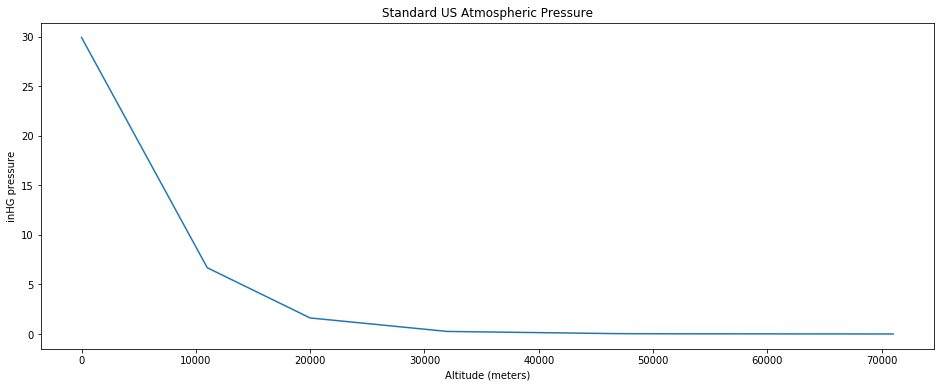

In [106]:
#1 psi = 6894.7572931783 Pa
def psitohg(psi):
    return psi*2.036

#T(K) = (T(°F) + 459.67)× 5/9
def farentokelvin(tempf):
    return (tempf + 459.67)*(5/9)

pressureDF = atmosDF["Static pressure"]
pressureDF
height = [0, 11000, 20000, 32000, 47000, 51000, 71000]
plt.figure(figsize=(16,6))
sb.lineplot(y="(inHg)", x=height, data=pressureDF, dashes = False)
plt.ylabel("inHG pressure")
plt.title("Standard US Atmospheric Pressure")
plt.xlabel("Altitude (meters)")

lowAP = payloadDF["Air Pressure"].min()
lowHg = psitohg(lowAP)
print("Payload's lowest converted pressure in inHG:", lowHg)
 

13. As you can see, the lowest converted pressure reading we have was -.02 inHg. Obviously, it does not make sense that we have a negative pressure, so this must be due to instrumentation limits. Assuming we have an error rate of +/- .03 inHg with the sensor, the highest minimum pressure reached was around .01 inHg. Comparing this to our payload pressure graph:

C:\Users\AJBuc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Payload Pressure')

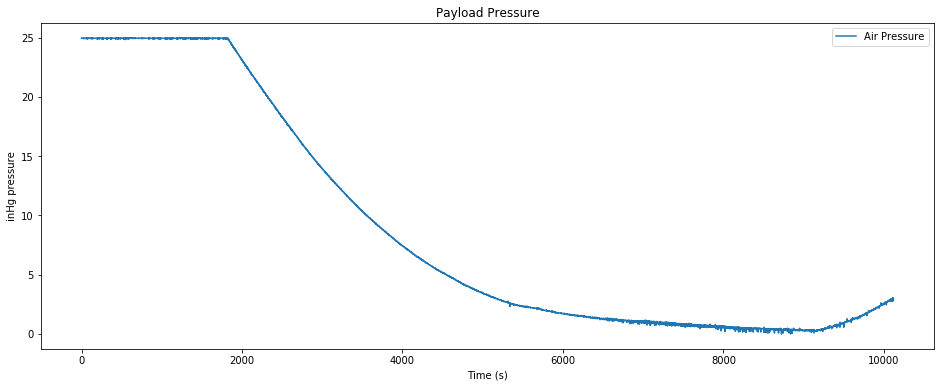

In [110]:
#creating new dataframe to store just pressure
tempDF = payloadDF[["Air Pressure"]]
tempDF['Air Pressure'] = tempDF['Air Pressure'].multiply(2.036)
#plotting the new dataframe
plt.figure(figsize=(16,6))
sb.lineplot(data=tempDF, dashes = False)
plt.xlabel("Time (s)")
plt.ylabel("inHg pressure")
plt.title("Payload Pressure")

14. We can see that they look pretty similar! Again, if our lowest pressure in inHg was around 0.01, that would put us at around 60,000 meters according to the US Standard Atmosphere data. Using the pandas .multiply function, i converted the payload pressure graph into inHg for easier comparison. We can also see the point the payload begins to descend, where the graph starts to point upwards. This is where our lowest air pressure was recorded, and the highest point in the flight. 

Lowest recorded temperature in Kelvin: 235.3666666666667


Text(0.5, 0, 'Altitude (meters)')

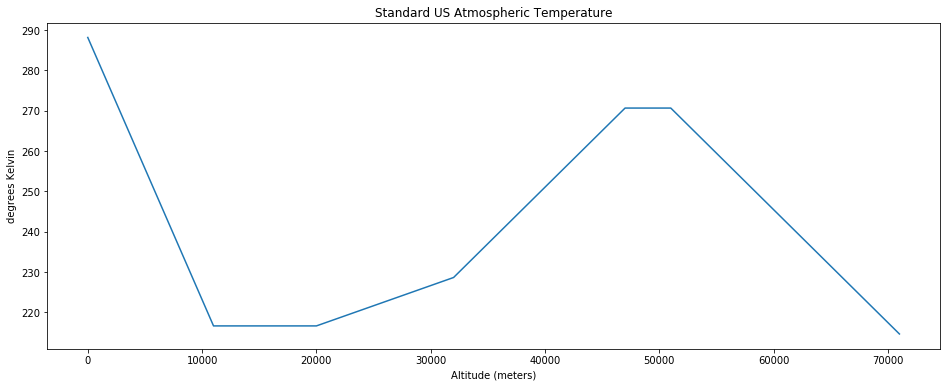

In [112]:
minT = payloadDF["Exterior Temp"].min()
minK = farentokelvin(minT)
print("Lowest recorded temperature in Kelvin:", minK)

temperatureDF = atmosDF["Standard temperature (K)"]
height = [0, 11000, 20000, 32000, 47000, 51000, 71000]
plt.figure(figsize=(16,6))
sb.lineplot(y="Standard temperature (K)", x=height, data=temperatureDF, dashes = False)
plt.ylabel("degrees Kelvin")
plt.title("Standard US Atmospheric Temperature")
plt.xlabel("Altitude (meters)")

15. This low temperature reading also points to our payload being around 60,000 meters at it's apex, according to the Standard Atmosphere data. Referring back to the temperature graph, i found it interesting that it actually gets hotter as the balloon ascends, until around 45,000 meters before the temperature starts to steadily fall.

## Conclusion

This project ended up being one of the most memorable experiences of my life. Using the concepts learned in this class, as well as my unique opportunity outside of school, I was able to create a meaningful and somewhat comprehensive writeup of my findings. Drawing from our lessons on reading and parsing HTML, I was able to access and create a dataframe from an external source to compare my final payload data to. This helped me hypothesize the height my payload reached, and using dataframe manipulation (also learned from class) i was able to distinguish the major events during flight. Below are some more photos of the process!

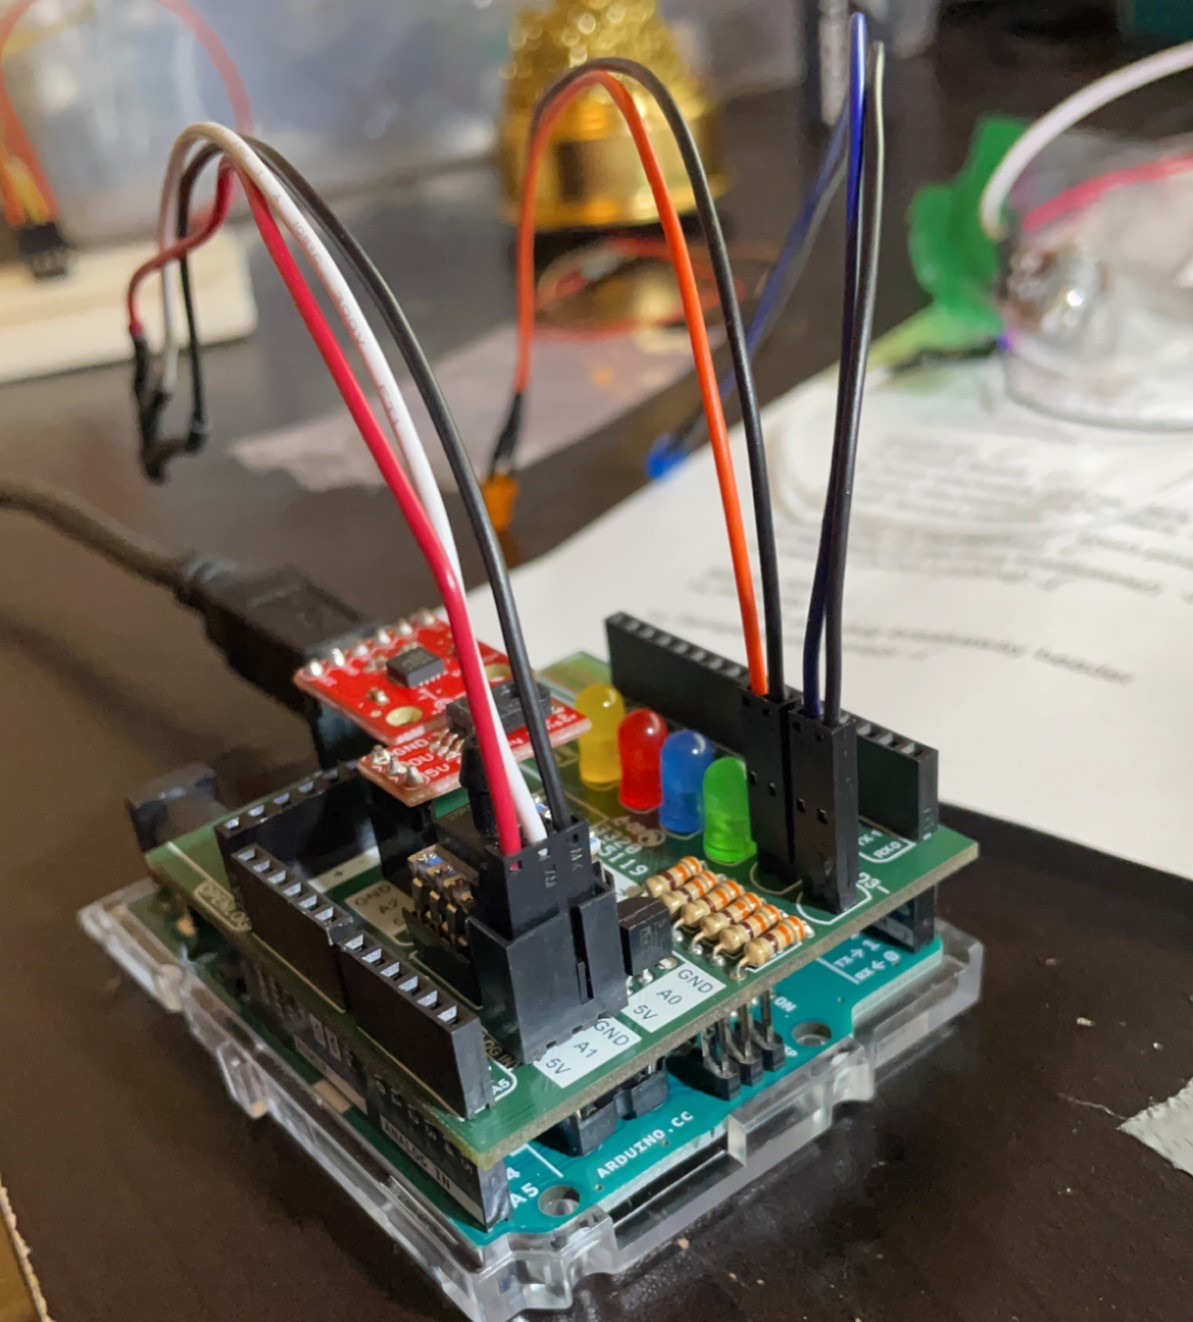

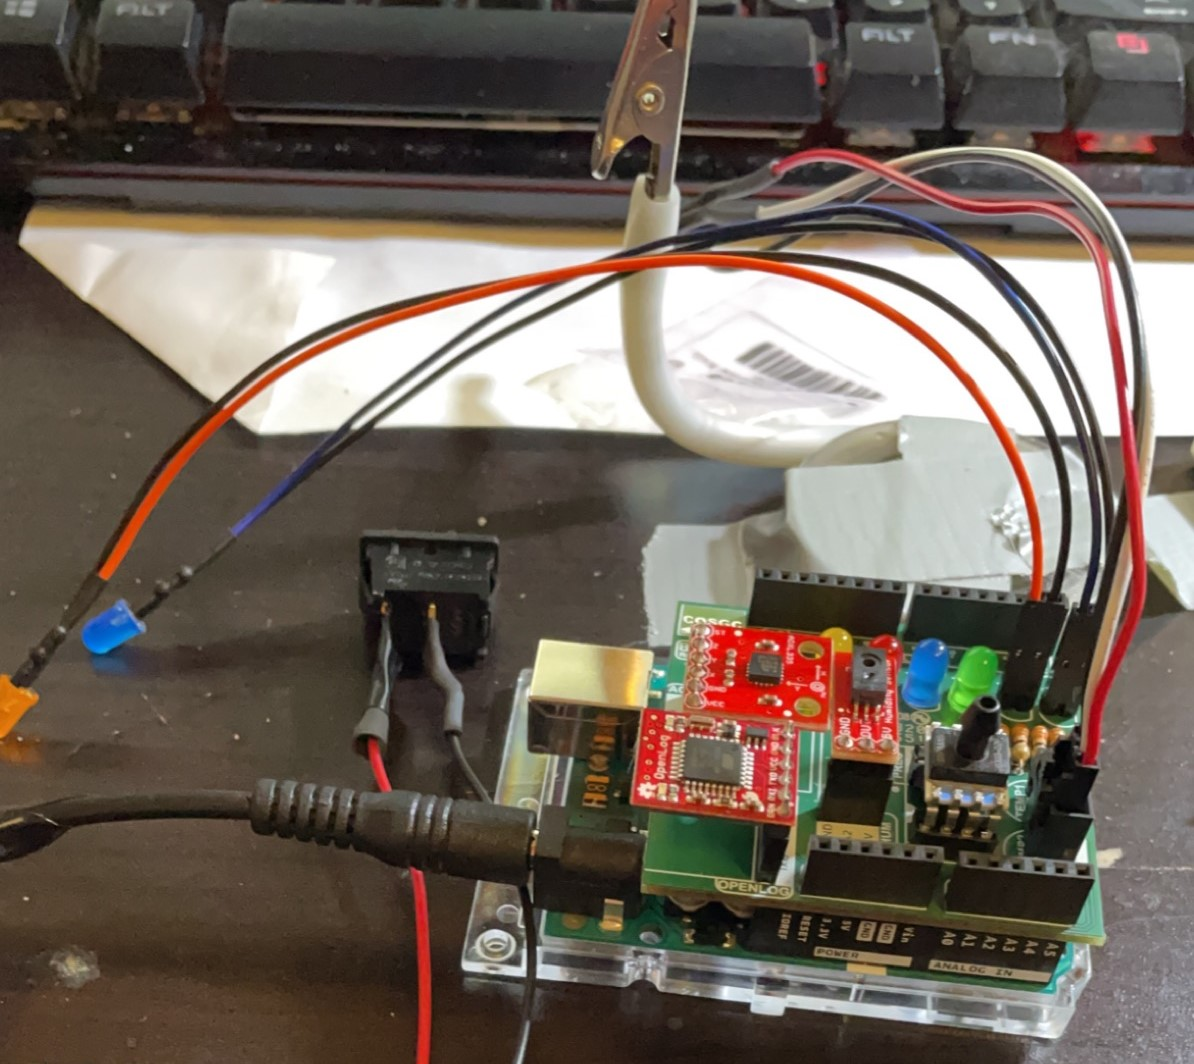

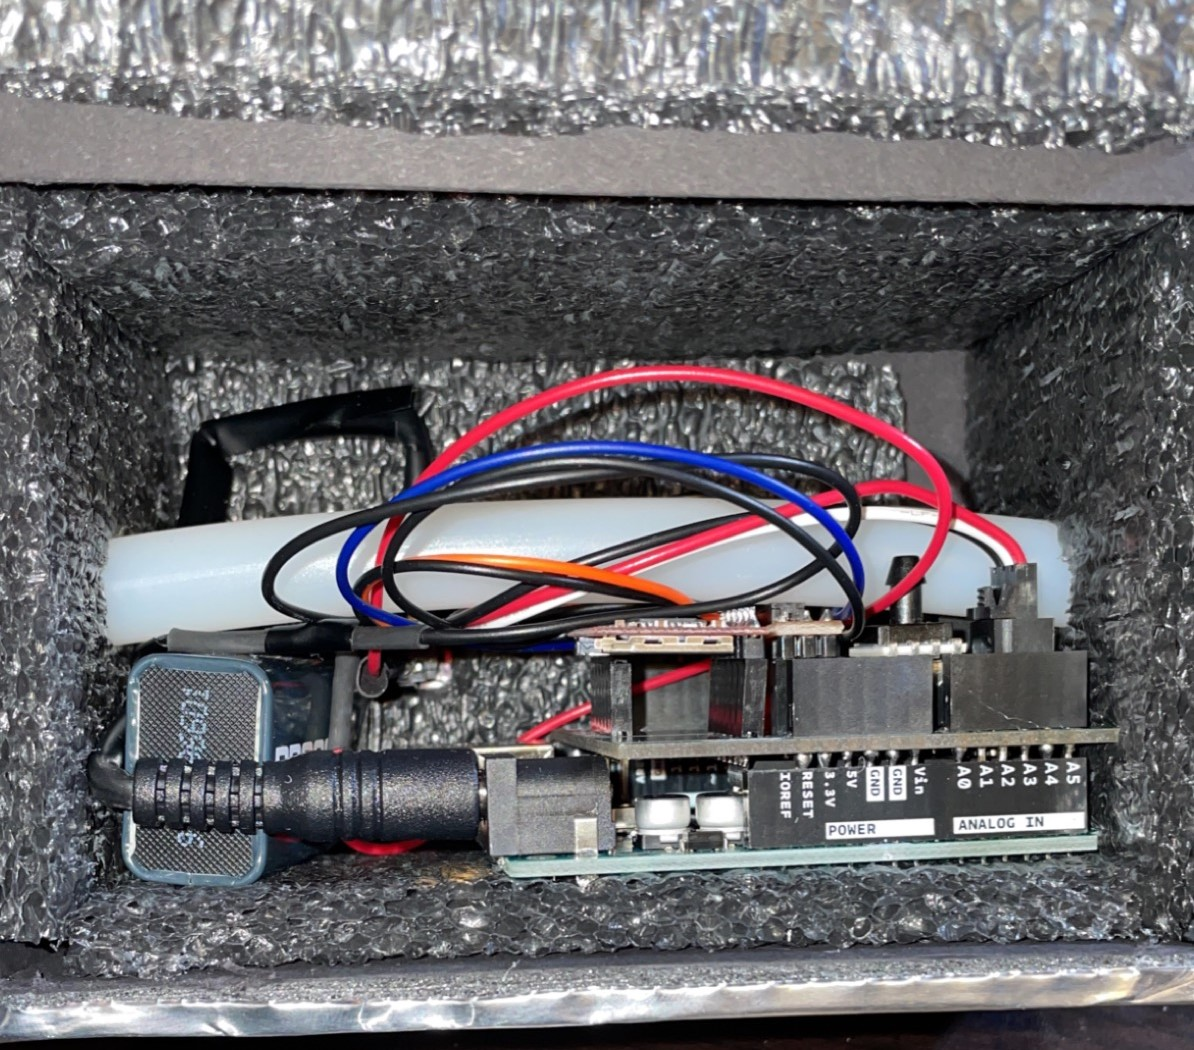